## Single label Classification

In [ ]:
import pandas as pd

EMOTION_LABELS = ["happiness", "angry", "disgust", "fear", "neutral", "sadness", "surprise"]
# EMOTION_LABLES = ["happiness", "angry", "disgust", "fear", "sadness", "surprise"] # neutral 제외
SCORE_LABLES = [emo+"_score" for emo in EMOTION_LABELS]

3개년도 파일 병합

In [2]:
features_df = pd.read_csv("extracted_features_v0.2.csv", index_col="wav_id")

labels_df_01 = pd.read_csv("4th.csv", encoding='cp949').set_index("wav_id")
labels_df_02 = pd.read_csv("5th_1st.csv", encoding='cp949').set_index("wav_id")
labels_df_03 = pd.read_csv("5th_2nd.csv", encoding='cp949').set_index("wav_id")

# 4차 + 5차_1차 + 5차_2차
labels_df = pd.concat([labels_df_01, labels_df_02, labels_df_03])

In [3]:
labels_df.head()

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,5번 감정,5번 감정세기,나이,성별
wav_id,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male


In [4]:
labels_df.columns

Index(['발화문', '상황', '1번 감정', '1번 감정세기', '2번 감정', '2번 감정세기', '3번 감정', '3번 감정세기',
       '4번 감정', '4번 감정세기', '5번 감정', '5번 감정세기', '나이', '성별'],
      dtype='object')

### single labeling guideline

angry, 1
angry, 1
angry, 1
sad, 2
sad, 2

-> angry ? sad ?
-> 점수 합 가장 큰 -> 같으면 count 큰

angry, 2
angry, 2
sad, 2
sad, 2
surprised, 2
-> 단순 합으로 계산했을 때 표본 개수가 적었던 순
-> surprise, disgust, fear, happiness, angry, sadness

sad, 1
sad, 1
neutral, 0
neutral, 0
neutral, 0

-> sad ? neutral ?
-> neutral count > 3 => neutral

In [8]:
from collections import OrderedDict
PRIOR_EMOTIONS = ['surprise', 'disgust', 'fear', 'happiness', 'angry', 'sadness', 'neutral']

def tag_final_emotion(row):
    emo_count = OrderedDict((emo, 0) for emo in PRIOR_EMOTIONS)
    emo_val_sum = OrderedDict((emo, 0) for emo in PRIOR_EMOTIONS)
    
    for i in range(1, 6):
        data_emo = row.get(f'{i}번 감정').lower()
        data_emo_val = row.get(f'{i}번 감정세기')
        emo_count[data_emo] += 1
        emo_val_sum[data_emo] += data_emo_val
    
    # 중립이 4개 이상인 경우 중립 리턴
    if emo_count['neutral'] > 3:
        return 'neutral'
    
    # 우선순위로 키값을 정렬해두어서 걸리면 바로 리턴
    max_val = max(emo_val_sum.values())
    for emo, val in emo_val_sum.items():
        if max_val == val:
            return emo
    
    return 'neutral'

labels_df['final_emotion'] = labels_df.apply(tag_final_emotion, axis=1)


In [9]:
labels_df.head()

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,5번 감정,5번 감정세기,나이,성별,final_emotion
wav_id,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,angry
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,Angry,1,27,male,angry
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,Angry,1,27,male,angry
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,Sadness,1,27,male,sadness
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,Sadness,1,32,male,sadness


메타컬럼 제거

In [10]:
META_COLUMS = [
    "발화문", "상황", "1번 감정", "1번 감정세기", "2번 감정", "2번 감정세기",
    "3번 감정", "3번 감정세기", "4번 감정", "4번 감정세기", "5번 감정", "5번 감정세기",
    "나이", "성별"
]

labels_df = labels_df.drop(columns=META_COLUMS)
labels_df.head()

,final_emotion
wav_id,
5e258fd1305bcf3ad153a6a4,angry
5e258fe2305bcf3ad153a6a5,angry
5e258ff5305bcf3ad153a6a6,angry
5e25902f305bcf3ad153a6a9,sadness
5e27f90b5807b852d9e0157b,sadness


라벨 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 감정 문자열 열
y_str = labels_df['final_emotion']  # 또는 감정 라벨이 있는 DataFrame

# 라벨 인코딩
le = LabelEncoder()
y_encoded = le.fit_transform(y_str)  # numpy array로 반환됨

# 원래 df에 저장해도 됨
labels_df['final_emotion_encoded'] = y_encoded

# 인코딩된 클래스 확인
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'angry': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}


In [13]:
labels_df.head()

,final_emotion,final_emotion_encoded
wav_id,,
5e258fd1305bcf3ad153a6a4,angry,0
5e258fe2305bcf3ad153a6a5,angry,0
5e258ff5305bcf3ad153a6a6,angry,0
5e25902f305bcf3ad153a6a9,sadness,5
5e27f90b5807b852d9e0157b,sadness,5


피처에서 특수기호 제거

In [14]:
def clean_columns(col):
    return col.replace('[', '_').replace(']', '').replace('<', '_')

features_df.columns = [clean_columns(col) for col in features_df.columns]
features_df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.07635,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.55907,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.33827,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.46028,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.28366,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


wav_id 조인

In [15]:
data = features_df.join(labels_df, how='inner')
data.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,final_emotion,final_emotion_encoded
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528,angry,0
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114,angry,0
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302,angry,0
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592,sadness,5
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sadness,5


X, y 분리

In [17]:
X = data[features_df.columns]
y = data['final_emotion_encoded']

X.head()


,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,2.592392e-07,0.0,2.592392e-07,28.0,0.0,3.462342e-08,-2.195436e-10,6.996994e-08,2.206284e-08,1.110736e-15,...,68.07635,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,1.436943e-07,0.0,1.436943e-07,59.0,0.0,2.807357e-08,-8.333632e-11,4.115737e-08,2.135804e-08,8.103691e-16,...,109.55907,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,2.645968e-07,0.0,2.645968e-07,132.0,0.0,2.765471e-08,-2.840646e-11,3.241280e-08,2.263397e-08,1.148836e-15,...,90.33827,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,2.422563e-07,0.0,2.422563e-07,127.0,0.0,3.293097e-08,-5.346202e-11,4.132451e-08,2.574871e-08,1.487964e-15,...,75.46028,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,1.468382e-08,0.0,1.468382e-08,88.0,0.0,1.369371e-09,-9.951729e-13,1.525613e-09,8.970344e-10,2.465537e-18,...,40.28366,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
y.head()

wav_id
5e258fd1305bcf3ad153a6a4    0
5e258fe2305bcf3ad153a6a5    0
5e258ff5305bcf3ad153a6a6    0
5e25902f305bcf3ad153a6a9    5
5e27ec9f5807b852d9e01542    5
Name: final_emotion_encoded, dtype: int64

학습셋, 테스트셋 8:2 분리

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
y_train.head()

wav_id
5e377cf47995ef170fc0ef07    5
5eceb2279aa8ea0eec53ef77    0
5e37a91905fef317e874be31    0
5f007caf704f492ee125615f    5
5fbb3285576e9378b67ac9c8    4
Name: final_emotion_encoded, dtype: int64

final_emotion
sadness      18507
angry         8540
happiness     5351
fear          3763
disgust       3543
neutral       2174
surprise      2113
Name: count, dtype: int64


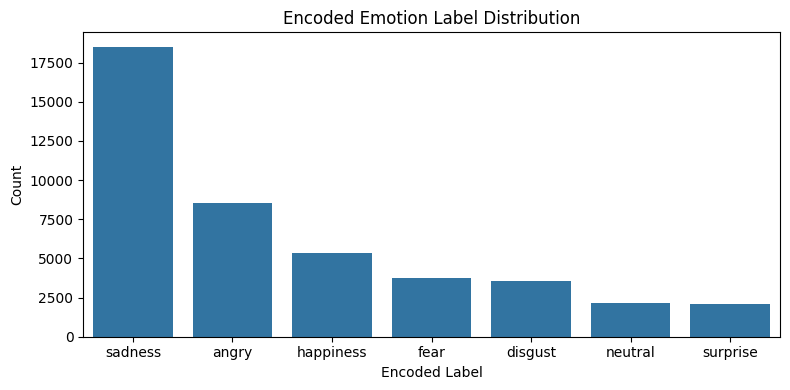

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

print(labels_df['final_emotion'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=labels_df, x='final_emotion', order=labels_df['final_emotion'].value_counts().index)
plt.title('Encoded Emotion Label Distribution')
plt.xlabel('Encoded Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# X: feature matrix, y: encoded emotion labels (int)
# le: LabelEncoder fitted on original labels
num_classes = len(np.unique(y))
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))  # {0: w0, 1: w1, ...}

# For per-class weights in XGBoost, set `scale_pos_weight` per sample manually (via sample_weight)
sample_weights = np.array([class_weight_dict[label] for label in y])

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
f1_scores = []
accuracies = []

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    sample_w_train = sample_weights[train_index]

    model = XGBClassifier(
        objective='multi:softmax',
        num_class=num_classes,
        eval_metric='mlogloss',
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        use_label_encoder=False,
        n_jobs=-1
    )

    model.fit(X_train, y_train, sample_weight=sample_w_train)

    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')

    print(f"\n[FOLD {fold}]")
    print("Accuracy:", acc)
    print("F1 Score (macro):", f1)
    print(classification_report(y_val, y_pred, target_names=le.classes_))

    accuracies.append(acc)
    f1_scores.append(f1)
    fold += 1

# 최종 평균 성능
print("\n=== Overall Performance ===")
print("Avg Accuracy:", np.mean(accuracies))
print("Avg F1 (macro):", np.mean(f1_scores))


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16252\3057168814.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:43:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[FOLD 1]
Accuracy: 0.4517339397384878
F1 Score (macro): 0.3730146790004722
              precision    recall  f1-score   support

       angry       0.38      0.39      0.39      1708
     disgust       0.26      0.24      0.25       708
        fear       0.30      0.27      0.28       752
   happiness       0.43      0.52      0.47      1070
     neutral       0.27      0.57      0.37       435
     sadness       0.65      0.55      0.59      3699
    surprise       0.26      0.25      0.26       423

    accuracy                           0.45      8795
   macro avg       0.37      0.40      0.37      8795
weighted avg       0.47      0.45      0.46      8795



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16252\3057168814.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[FOLD 2]
Accuracy: 0.4610574189880614
F1 Score (macro): 0.37281881266654315
              precision    recall  f1-score   support

       angry       0.40      0.41      0.40      1708
     disgust       0.26      0.23      0.25       709
        fear       0.30      0.25      0.28       752
   happiness       0.41      0.51      0.46      1071
     neutral       0.26      0.52      0.35       434
     sadness       0.65      0.58      0.61      3699
    surprise       0.29      0.25      0.27       422

    accuracy                           0.46      8795
   macro avg       0.37      0.39      0.37      8795
weighted avg       0.48      0.46      0.46      8795



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16252\3057168814.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[FOLD 3]
Accuracy: 0.46606026151222285
F1 Score (macro): 0.37467057296607653
              precision    recall  f1-score   support

       angry       0.40      0.41      0.41      1707
     disgust       0.26      0.23      0.24       709
        fear       0.30      0.28      0.29       753
   happiness       0.44      0.52      0.47      1070
     neutral       0.26      0.53      0.35       434
     sadness       0.67      0.58      0.62      3700
    surprise       0.27      0.23      0.25       422

    accuracy                           0.47      8795
   macro avg       0.37      0.40      0.37      8795
weighted avg       0.48      0.47      0.47      8795



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16252\3057168814.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:05:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[FOLD 4]
Accuracy: 0.46071631608868674
F1 Score (macro): 0.3685797477240704
              precision    recall  f1-score   support

       angry       0.40      0.41      0.41      1707
     disgust       0.28      0.23      0.25       709
        fear       0.29      0.23      0.26       753
   happiness       0.41      0.48      0.44      1070
     neutral       0.26      0.49      0.34       435
     sadness       0.64      0.59      0.61      3699
    surprise       0.29      0.26      0.27       422

    accuracy                           0.46      8795
   macro avg       0.37      0.38      0.37      8795
weighted avg       0.47      0.46      0.46      8795



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16252\3057168814.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[FOLD 5]
Accuracy: 0.4533257532689028
F1 Score (macro): 0.368263094896947
              precision    recall  f1-score   support

       angry       0.40      0.38      0.39      1707
     disgust       0.28      0.25      0.27       708
        fear       0.25      0.23      0.24       753
   happiness       0.41      0.53      0.46      1070
     neutral       0.27      0.55      0.36       435
     sadness       0.65      0.56      0.60      3699
    surprise       0.27      0.24      0.25       423

    accuracy                           0.45      8795
   macro avg       0.36      0.39      0.37      8795
weighted avg       0.47      0.45      0.46      8795


=== Overall Performance ===
Avg Accuracy: 0.45857873791927234
Avg F1 (macro): 0.3714693814508218


In [27]:
test_feature = pd.read_csv("test.csv", index_col="wav_id")
intensity_cols = [c for c in test_feature.columns if 'intensity' in c.lower()]
loudness_cols = [c for c in test_feature.columns if 'loudness' in c.lower()]
# test_feature = test_feature.drop(columns=loudness_cols+intensity_cols)
test_feature.columns = [clean_columns(col) for col in test_feature.columns]
test_feature

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
angry_01_8,4.737529e-08,0.000000e+00,4.737529e-08,182.0,0.0,4.272380e-09,-4.002404e-12,5.146906e-09,5.097481e-09,6.032633e-17,...,46.258064,6.851184,0.911313,9.082946,-2.044131,0.0,3.931571,2.044131,3.931571,5.975702
angry_test,8.961715e-05,0.000000e+00,8.961715e-05,5663.0,0.0,4.784350e-06,-1.033696e-10,5.090996e-06,5.653985e-06,8.274449e-11,...,15.643345,3.955818,2.421736,33.733105,-0.502805,0.0,0.130181,0.502805,0.130181,0.632987
mumu_happy,1.990311e-04,0.000000e+00,1.990311e-04,114.0,0.0,1.354427e-05,-1.205456e-07,2.776866e-05,1.731955e-05,1.001775e-09,...,62.118793,8.262791,4.361240,30.860530,0.000000,0.0,1.535260,0.000000,1.535260,1.535260
sad_test,2.388542e-04,3.138450e-11,2.388541e-04,2554.0,2095.0,1.400103e-05,-1.469861e-09,1.666956e-05,1.939705e-05,1.073416e-09,...,21.416970,4.630403,0.121920,8.500369,0.000000,0.0,0.200413,0.000000,0.200413,0.200413
일반_김지수_드라마_담담한_슬픔 (mp3cut.net),1.200066e-05,0.000000e+00,1.200066e-05,482.0,0.0,5.526724e-07,-7.898922e-10,8.919310e-07,8.145134e-07,2.083608e-12,...,35.147434,5.957128,1.740265,14.896964,-0.999467,0.0,0.952941,0.999467,0.952941,1.952409
일반_정다현_20대여(차분-슬픔-심각) (mp3cut.net),2.436266e-05,0.000000e+00,2.436266e-05,35.0,0.0,1.195053e-06,-1.572876e-09,1.766007e-06,1.427230e-06,5.350814e-12,...,25.192457,5.050450,2.154539,24.426476,-0.311090,0.0,1.054292,0.311090,1.054292,1.365382
티모 (mp3cut.net),1.389474e-04,0.000000e+00,1.389474e-04,195.0,0.0,1.133394e-05,-3.852343e-09,1.216412e-05,1.502584e-05,4.865487e-10,...,58.242620,7.723068,3.056769,22.967290,-1.314974,0.0,2.584575,1.314974,2.584575,3.899549


In [31]:
y_t = model.predict(test_feature)
y_t_str = le.inverse_transform(y_t)
df_result = pd.DataFrame({
    'wav_id': test_feature.index,
    'predicted_emotion': y_t_str
})
y_df = pd.DataFrame(y_t, columns=['result'])

df_result

,wav_id,predicted_emotion
0,angry_01_8,disgust
1,angry_test,angry
2,mumu_happy,happiness
3,sad_test,angry
4,일반_김지수_드라마_담담한_슬픔 (mp3cut.net),angry
5,일반_정다현_20대여(차분-슬픔-심각) (mp3cut.net),angry
6,티모 (mp3cut.net),angry
